In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [297]:
# cols = ['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date', 'isfraud', 'typeoffraud']
df = pd.read_csv('banktransaction.csv', header=0)
cols = df.columns

In [298]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [299]:
df.columns

Index(['typeofaction', 'sourceid', 'destinationid', 'amountofmoney', 'date',
       'isfraud', 'typeoffraud'],
      dtype='object')

In [300]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [301]:
df.shape


(2340, 7)

In [302]:
# convert date into pandas datetime object
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y%m%d').astype(int)

In [303]:
df['typeofaction'].unique()

array(['cash-in', 'transfer'], dtype=object)

In [304]:
type_of_action = df['typeofaction'].value_counts()

In [305]:
transaction = type_of_action.index

In [306]:
quantity = type_of_action.values

In [307]:
import plotly.express as px

In [308]:
px.pie(df,values=quantity,names=transaction, hole=0.4, title='Type of transaction')

In [309]:
df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,20190719,1,type1
1,cash-in,30105,8692,494528,20190517,1,type1
2,cash-in,30105,60094,494528,20190720,1,type1
3,cash-in,30105,20575,494528,20190703,1,type1
4,cash-in,30105,45938,494528,20190526,1,type1
...,...,...,...,...,...,...,...
2335,transfer,14945,43793,106907,20190329,0,none
2336,transfer,9532,43793,106907,20190413,0,none
2337,transfer,27332,43793,106907,20190510,0,none
2338,transfer,32685,43793,106907,20190708,0,none


1399
2340


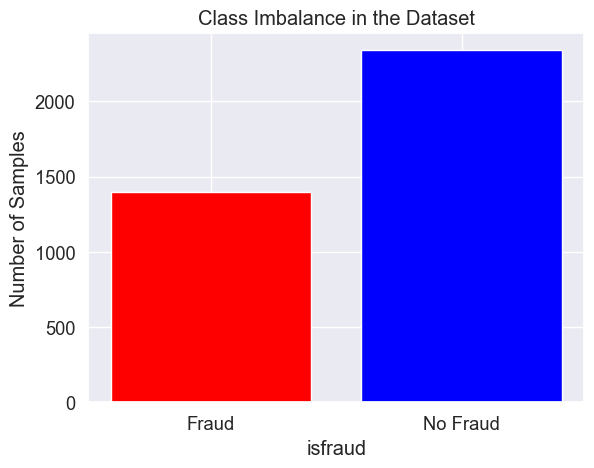

In [310]:
fraud_count = (df['isfraud'] == 1).sum()
no_fraud_count = len(df['isfraud']== 0)

print(fraud_count)
print(no_fraud_count)

# Create a bar plot to display the class imbalance
plt.bar(['Fraud', 'No Fraud'], [fraud_count, no_fraud_count], color=['red', 'blue'])
plt.xlabel('isfraud')
plt.ylabel('Number of Samples')
plt.title('Class Imbalance in the Dataset')
plt.show()


In [311]:
# replace trasnfer and cash-in values with numbers
df.replace(to_replace=['transfer', 'cash-in'],value=[1,2],inplace=True)

In [312]:
df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,2,30105,28942,494528,20190719,1,type1
1,2,30105,8692,494528,20190517,1,type1
2,2,30105,60094,494528,20190720,1,type1
3,2,30105,20575,494528,20190703,1,type1
4,2,30105,45938,494528,20190526,1,type1
...,...,...,...,...,...,...,...
2335,1,14945,43793,106907,20190329,0,none
2336,1,9532,43793,106907,20190413,0,none
2337,1,27332,43793,106907,20190510,0,none
2338,1,32685,43793,106907,20190708,0,none


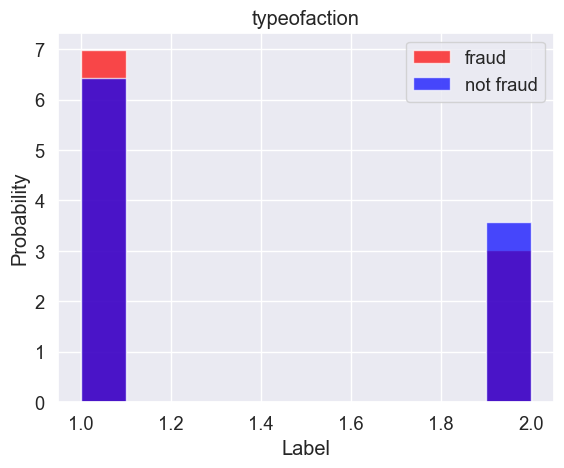

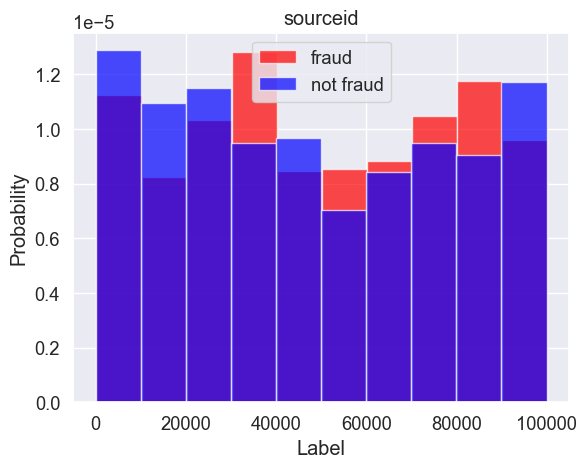

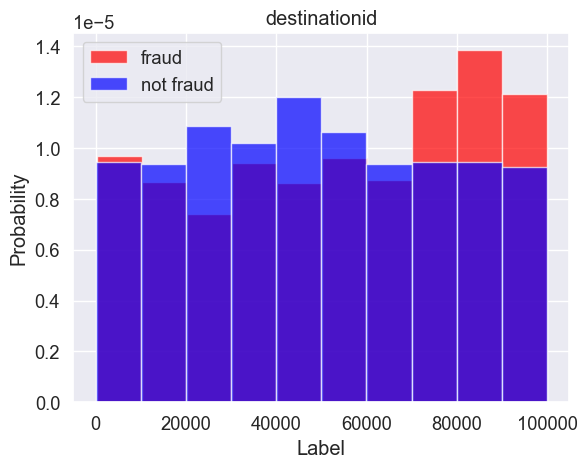

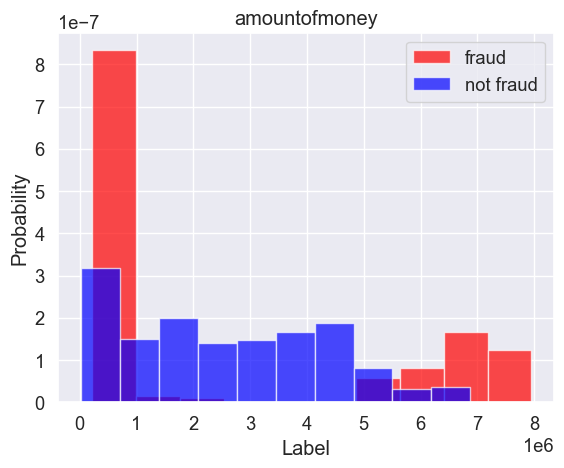

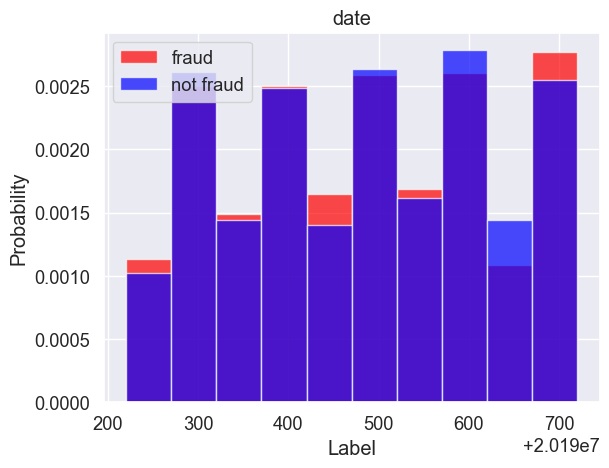

In [313]:
for label in cols[:-2]:
  plt.hist(df[df['isfraud']==1][label], color='red', label='fraud', alpha=0.7, density=True)
  plt.hist(df[df['isfraud']==0][label], color='blue', label='not fraud', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel('Label')
  plt.legend()
  plt.show()

In [314]:
from sklearn.model_selection import train_test_split

df['isfraud']=df['isfraud'].map({0:'no fraud', 1:'fraud'})
df = df.sample(frac = 1)
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [315]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-2]].values
  y = dataframe[dataframe.columns[-2]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data =  np.hstack((x, np.reshape(y, (-1, 1))))


  return data, x, y

In [316]:
train, x_train, y_train = scale_dataset(train, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=False)

kNN

In [317]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [318]:
y_pred = knn_model.predict(x_test)

In [319]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       fraud       0.82      0.85      0.83       271
    no fraud       0.78      0.75      0.76       197

    accuracy                           0.80       468
   macro avg       0.80      0.80      0.80       468
weighted avg       0.80      0.80      0.80       468

[[229  42]
 [ 50 147]]


In [320]:
import seaborn as sns

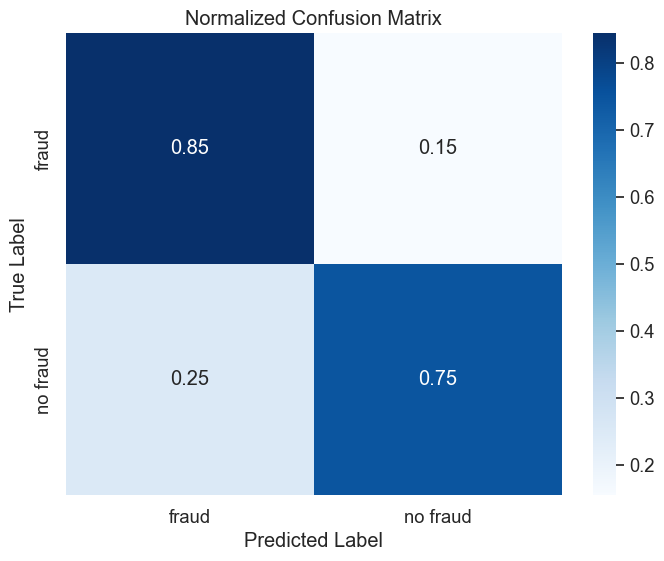

In [321]:
def plot_normalized_confusion_matrix(y_test, y_pred, classes):
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalized Confusion Matrix')
    plt.grid(True)
    plt.show()

plot_normalized_confusion_matrix(y_test, y_pred, classes=["fraud", "no fraud"])

In [322]:
# from joblib import dump, load
# dump(model, 'model.joblib')
# model_in = load('model.joblib')
knn_model.predict(np.array([[0,30105,28942,494528,20190719]])) # fraud

array(['fraud'], dtype=object)

In [323]:
knn_model.predict(np.array([[1,76094,78341,6738027,20190523]])) # fraud


array(['fraud'], dtype=object)

In [324]:
knn_model.predict(np.array([[1,8400,6477,518689,20190419]]))  # fraud

array(['fraud'], dtype=object)

In [325]:
knn_model.predict(np.array([[0,11850,55033,4040477,20190312]]))  # no fraud

array(['fraud'], dtype=object)

In [326]:
knn_model.predict(np.array([[1,23477,68698,302294,20190612]]))  # no fraud

array(['fraud'], dtype=object)

              precision    recall  f1-score   support

       fraud       0.81      0.66      0.73       271
    no fraud       0.63      0.79      0.70       197

    accuracy                           0.72       468
   macro avg       0.72      0.73      0.71       468
weighted avg       0.73      0.72      0.72       468

[[180  91]
 [ 42 155]]


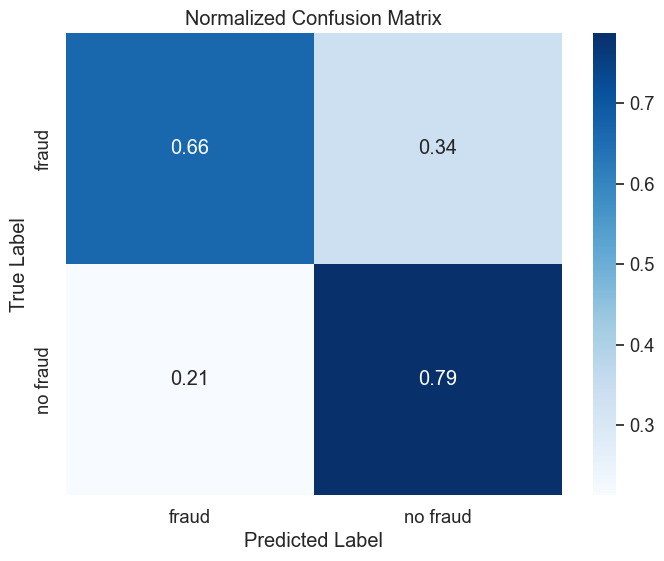

In [327]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plot_normalized_confusion_matrix(y_test, y_pred, classes=["fraud", "no fraud"])

In [333]:
nb_model.predict(np.array([[0,30105,28942,494528,20190719]]))  # draud
nb_model.predict(np.array([[1,76094,78341,6738027,20190523]]))  # fraud
nb_model.predict(np.array([[1,8400,6477,518689,20190419]]))  # fraud
nb_model.predict(np.array([[0,11850,55033,4040477,20190312]]))  # no fraud
nb_model.predict(np.array([[1,23477,68698,302294,20190612]]))  # no fraud


array(['no fraud'], dtype='<U8')